In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1 - Data preparation

## 1.1 - Read and shuffle data

In [139]:
df = pd.read_csv('vegemite.csv')

df = df.sample(n=len(df)).reset_index(drop=True)

df.to_csv('vegemite_shuffled.csv', index=False)

df.shape

(15237, 47)

## 1.2 - Create training set with 1002 data points

In [140]:
df_train, df_real_test = train_test_split(df, test_size=1000, stratify=df['Class'], random_state=42)

print(f"Number of rows in the test/validation set: {df_real_test.shape[0]}")
print(f"Number of rows in the training set: {df_train.shape[0]}")

Number of rows in the test/validation set: 1000
Number of rows in the training set: 14237


## 1.3 - Remove columns with constants

In [141]:
constant_columns = [col for col in df_train.columns if df_train[col].nunique() == 1]

# Remove those columns
df_train = df_train.drop(columns=constant_columns)

print("Columns removed:", constant_columns)

Columns removed: ['TFE Steam temperature SP', 'TFE Product out temperature']


In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14237 entries, 8121 to 1858
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FFTE Feed tank level SP        14237 non-null  float64
 1   FFTE Production solids SP      14237 non-null  float64
 2   FFTE Steam pressure SP         14237 non-null  float64
 3   TFE Out flow SP                14237 non-null  float64
 4   TFE Production solids SP       14237 non-null  float64
 5   TFE Vacuum pressure SP         14237 non-null  float64
 6   TFE Steam pressure SP          14237 non-null  float64
 7   FFTE Feed flow SP              14237 non-null  float64
 8   FFTE Out steam temp SP         14237 non-null  float64
 9   Extract tank Level             14237 non-null  float64
 10  Extract tank Out flow PV       14237 non-null  float64
 11  FFTE Discharge density         14237 non-null  float64
 12  FFTE Discharge solids          14237 non-null  fl

In [143]:
# Define the threshold for "few" unique values (e.g., 10 or fewer)
threshold = 10

# Identify integer columns with few unique values
cols_to_convert = [col for col in df_train.columns if col != 'Class' and df_train[col].nunique() <= threshold]

cols_to_convert  

['FFTE Feed tank level SP',
 'FFTE Pump 1',
 'FFTE Pump 1 - 2',
 'FFTE Pump 2',
 'TFE Motor speed']

In [144]:
label_encoders = {}

for col in cols_to_convert:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

df_train.to_csv('vegemite_converted.csv', index = False)

## 1.4 - Check class distribution

In [145]:
class_distribution = df_train['Class'].value_counts()

print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
2    7053
1    4716
0    2468
Name: count, dtype: int64


In [146]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter

X = df_train.drop('Class', axis=1)
y = df_train['Class']

print(f"Initial class distribution:\n{Counter(y)}")

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

tomek_links = TomekLinks()
X_balanced, y_balanced = tomek_links.fit_resample(X_smote, y_smote)

print(f"Class distribution after SMOTE and Tomek Links:\n{Counter(y_balanced)}")

df_train = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.Series(y_balanced, name='Class')], axis=1)

Initial class distribution:
Counter({2: 7053, 1: 4716, 0: 2468})
Class distribution after SMOTE and Tomek Links:
Counter({0: 7053, 1: 6962, 2: 6937})


## 1.5 - Data normalization

In [147]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
FFTE Feed tank level SP,20952.0,1.738736,0.667249,0.00,2.000000,2.000000,2.000000,2.00
FFTE Production solids SP,20952.0,41.783231,1.104605,39.00,40.834296,42.000000,43.000000,43.00
FFTE Steam pressure SP,20952.0,118.223142,16.269049,60.00,107.000000,120.000000,128.960000,225.00
TFE Out flow SP,20952.0,2404.954889,386.689000,1687.18,2066.670000,2240.020000,2846.510000,3012.56
TFE Production solids SP,20952.0,62.500533,14.564176,0.00,62.000000,65.000000,70.000000,98.00
TFE Vacuum pressure SP,20952.0,-65.927927,13.296908,-80.00,-78.452792,-69.822142,-55.121961,-36.37
TFE Steam pressure SP,20952.0,115.076912,24.417051,2.00,120.000000,120.000000,120.000000,135.00
FFTE Feed flow SP,20952.0,9981.526280,1356.990181,1100.00,9400.000000,9600.000000,10200.000000,18000.00
FFTE Out steam temp SP,20952.0,49.704251,1.947599,40.71,50.000000,50.000000,50.000000,54.38
Extract tank Level,20952.0,47.638813,18.362782,0.62,37.710000,52.368476,62.279159,75.62


In [148]:
from sklearn.preprocessing import MinMaxScaler

features = df_train.drop(columns=['Class'])
target = df_train['Class']

# Min-Max Scaling
scaler = MinMaxScaler()
min_max_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Combine the scaled features back with the target column
df_scaled = min_max_scaled.copy()
df_scaled['Class'] = target.values

df_train = df_scaled

# Display the first few rows of the scaled DataFrame
df_train.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,...,TFE Motor speed,TFE Out flow PV,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
0,0.0,1.000,0.303030,0.838922,0.051020,1.000000,0.887218,0.526627,0.76079,0.014933,...,1.0,0.099301,0.730566,0.760870,0.709779,0.559933,0.788030,0.361702,0.200854,0
1,0.0,1.000,0.424242,0.429032,0.397959,0.269539,0.887218,0.497041,0.67959,0.664800,...,1.0,0.125901,0.069666,0.815217,0.709779,0.647302,0.087401,0.489362,0.459752,2
2,1.0,0.375,0.335273,0.459581,0.642857,0.953931,0.924812,0.485207,0.67959,0.893333,...,1.0,0.063350,0.690070,0.728261,0.740085,0.770233,0.842774,0.702128,0.525025,0
3,0.0,0.750,0.606061,0.715131,0.642857,0.687600,0.887218,0.644970,1.00000,0.664400,...,1.0,0.085620,0.685493,0.815217,0.742039,0.258277,0.837430,0.212766,0.277735,1
4,1.0,1.000,0.544848,0.984397,0.693878,0.337841,0.924812,0.556213,0.67959,0.727333,...,1.0,0.124482,0.741815,0.771739,0.740085,0.450950,0.868424,0.234043,0.081262,2


# 2 - Feature engineering

In [149]:
df_train.shape

(20952, 45)

## 2.1 - Correlation matrix analysis

In [150]:
corr = abs(df_train.corr()).T

corr

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,...,TFE Motor speed,TFE Out flow PV,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,Class
FFTE Feed tank level SP,1.000000,0.082641,0.237227,0.033816,0.314571,0.269581,0.535391,0.491404,0.049409,0.057324,...,0.270452,0.136035,0.260904,0.048252,0.193777,0.025733,0.085027,0.027378,0.259474,0.047649
FFTE Production solids SP,0.082641,1.000000,0.044360,0.555335,0.315675,0.197354,0.088006,0.259225,0.081575,0.030971,...,0.050164,0.009196,0.081518,0.055829,0.018214,0.058128,0.047160,0.064171,0.071102,0.131534
FFTE Steam pressure SP,0.237227,0.044360,1.000000,0.061937,0.048159,0.098712,0.301492,0.284037,0.076395,0.054661,...,0.159078,0.034000,0.171934,0.047312,0.121768,0.037281,0.103620,0.002936,0.148254,0.094107
TFE Out flow SP,0.033816,0.555335,0.061937,1.000000,0.276473,0.265381,0.055392,0.304252,0.015487,0.042546,...,0.079487,0.042624,0.010525,0.010669,0.022955,0.053144,0.063060,0.046070,0.073687,0.192125
TFE Production solids SP,0.314571,0.315675,0.048159,0.276473,1.000000,0.171159,0.395785,0.313011,0.032227,0.018641,...,0.004615,0.030713,0.071980,0.026737,0.039682,0.031642,0.046994,0.015661,0.012746,0.012447
TFE Vacuum pressure SP,0.269581,0.197354,0.098712,0.265381,0.171159,1.000000,0.241407,0.305030,0.013926,0.003500,...,0.108886,0.068882,0.092581,0.017472,0.106148,0.039384,0.004700,0.060641,0.137265,0.118654
TFE Steam pressure SP,0.535391,0.088006,0.301492,0.055392,0.395785,0.241407,1.000000,0.835640,0.043116,0.018085,...,0.304549,0.150952,0.332677,0.133434,0.239184,0.087076,0.069255,0.038321,0.261910,0.017154
FFTE Feed flow SP,0.491404,0.259225,0.284037,0.304252,0.313011,0.305030,0.835640,1.000000,0.048956,0.010666,...,0.287344,0.151658,0.297283,0.116199,0.220673,0.054333,0.076224,0.001311,0.260801,0.113432
FFTE Out steam temp SP,0.049409,0.081575,0.076395,0.015487,0.032227,0.013926,0.043116,0.048956,1.000000,0.017927,...,0.021022,0.040628,0.005566,0.060881,0.047116,0.033005,0.041133,0.034662,0.021293,0.055483
Extract tank Level,0.057324,0.030971,0.054661,0.042546,0.018641,0.003500,0.018085,0.010666,0.017927,1.000000,...,0.164683,0.117773,0.116031,0.083710,0.115740,0.046399,0.118431,0.004352,0.145533,0.054682


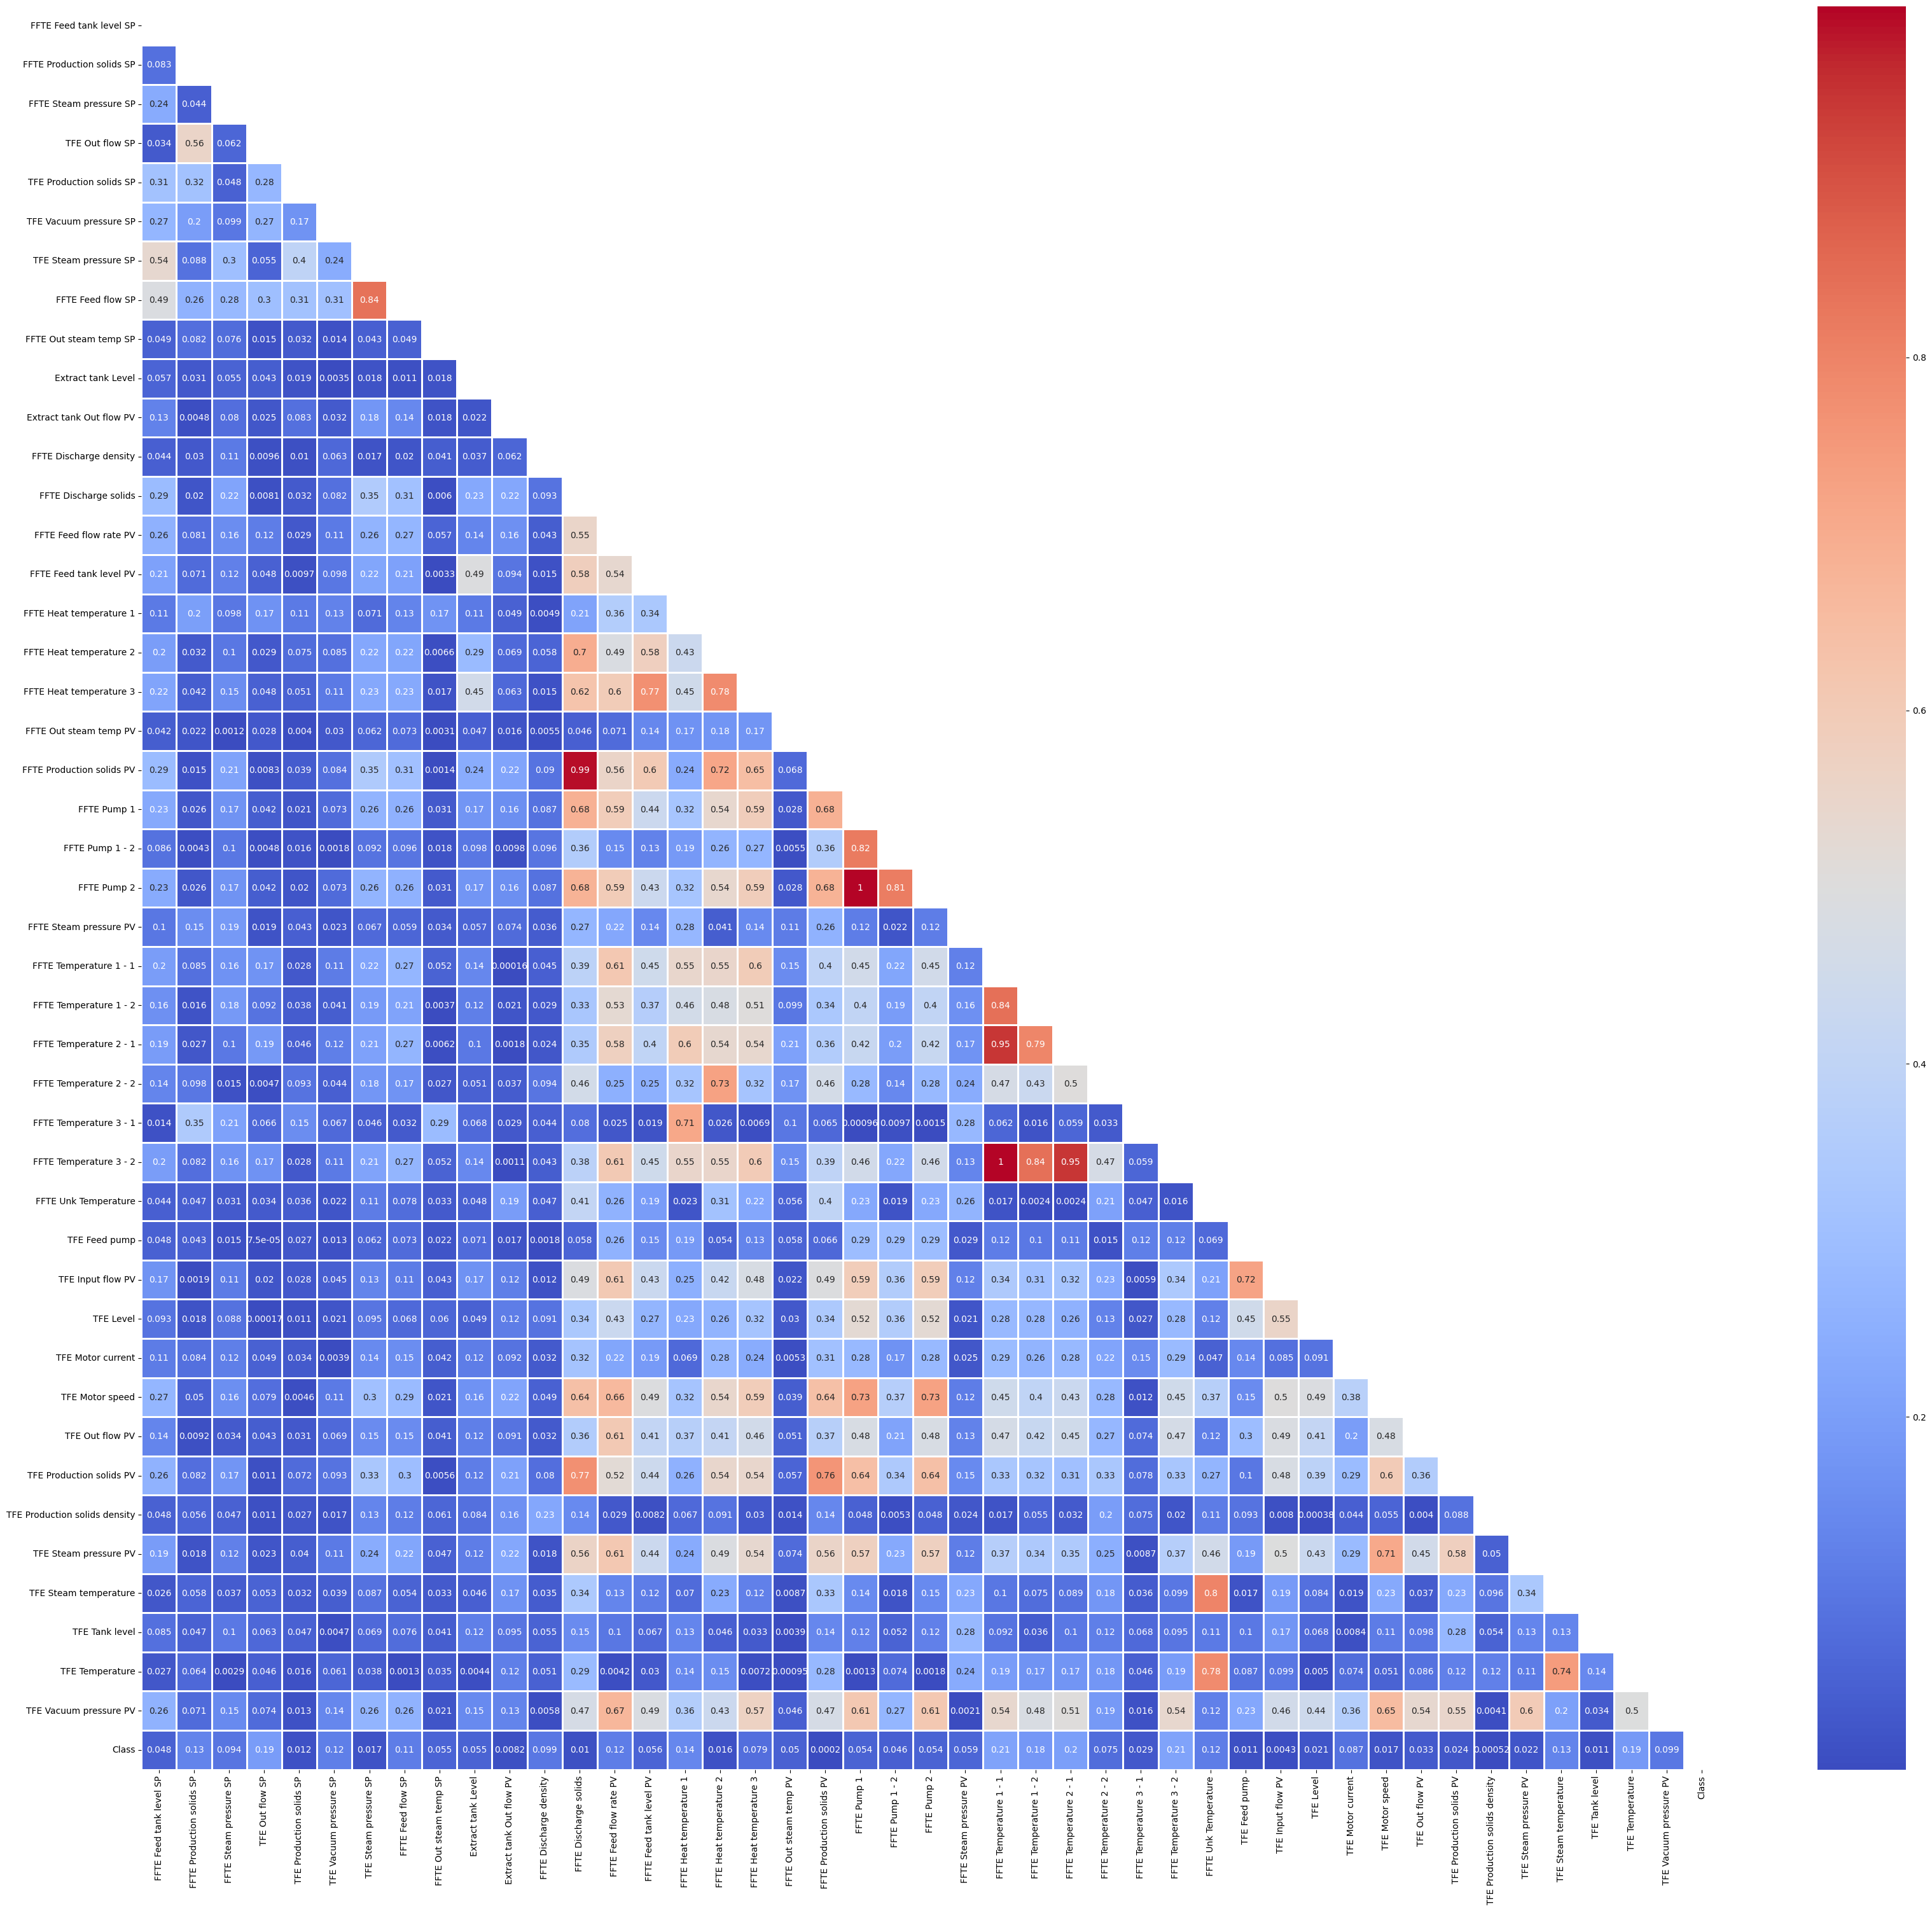

In [151]:
import seaborn as sns

corr = abs(df_train.corr())
lower_triangle = np.tril(corr, k=-1)
mask = lower_triangle == 0

plt.figure(figsize=(40, 36))
sns.heatmap(corr, center=0.5, cmap='coolwarm', annot=True, 
            xticklabels=corr.columns, yticklabels=corr.columns, 
            cbar=True, linewidths=1, mask=mask)
plt.show()

## 2.2 - Create composite features based on correlation

In [153]:
threshold = 0.1
corr_matrix = df_train.corr()

# Get the correlation of each feature with the target column
target_corr = corr_matrix['Class']

# # Find features with small positive correlations with the target column
small_positive_corr = target_corr[(target_corr > 0) & (target_corr <= threshold)].index.tolist()

# Filter the correlation matrix to include only the small positive correlations
filtered_corr_matrix = corr_matrix.loc[small_positive_corr, small_positive_corr]

pairs = []

for i, feature in enumerate(small_positive_corr):
    for other_feature in small_positive_corr[i+1:]:
        if 0 < filtered_corr_matrix.loc[feature, other_feature] <= threshold:
            pairs.append((feature, other_feature))

len(small_positive_corr), len(pairs)

(16, 20)

In [157]:
for pair in pairs:
    feature1, feature2 = pair
    new_feature_name = f'{feature1}_{feature2}'
    df_train[new_feature_name] = df_train[feature1] + df_train[feature2]

df_train.to_csv('vegemite_composite.csv', index=False)

df_train.columns

Index(['FFTE Feed tank level SP', 'FFTE Production solids SP',
       'FFTE Steam pressure SP', 'TFE Out flow SP', 'TFE Production solids SP',
       'TFE Vacuum pressure SP', 'TFE Steam pressure SP', 'FFTE Feed flow SP',
       'FFTE Out steam temp SP', 'Extract tank Level',
       'Extract tank Out flow PV', 'FFTE Discharge density',
       'FFTE Discharge solids', 'FFTE Feed flow rate PV',
       'FFTE Feed tank level PV', 'FFTE Heat temperature 1',
       'FFTE Heat temperature 2', 'FFTE Heat temperature 3',
       'FFTE Out steam temp PV', 'FFTE Production solids PV', 'FFTE Pump 1',
       'FFTE Pump 1 - 2', 'FFTE Pump 2', 'FFTE Steam pressure PV',
       'FFTE Temperature 1 - 1', 'FFTE Temperature 1 - 2',
       'FFTE Temperature 2 - 1', 'FFTE Temperature 2 - 2',
       'FFTE Temperature 3 - 1', 'FFTE Temperature 3 - 2',
       'FFTE Unk Temperature', 'TFE Feed pump', 'TFE Input flow PV',
       'TFE Level', 'TFE Motor current', 'TFE Motor speed', 'TFE Out flow PV',
       'TFE P

In [159]:
cols =[col for col in df_train.columns]
len(cols)

65

## 2.3 - Feature Selection

In [164]:
df = pd.read_csv('vegemite_composite.csv')

df.head()

,FFTE Feed tank level SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,FFTE Feed flow SP,FFTE Out steam temp SP,Extract tank Level,...,TFE Production solids SP_TFE Production solids PV,TFE Production solids SP_TFE Steam pressure PV,Extract tank Out flow PV_FFTE Steam pressure PV,Extract tank Out flow PV_TFE Feed pump,Extract tank Out flow PV_TFE Out flow PV,FFTE Steam pressure PV_TFE Level,FFTE Steam pressure PV_TFE Vacuum pressure PV,FFTE Temperature 2 - 2_TFE Feed pump,TFE Motor current_TFE Tank level,TFE Out flow PV_TFE Tank level
0,0.0,1.000,0.303030,0.838922,0.051020,1.000000,0.887218,0.526627,0.76079,0.014933,...,0.781587,0.760799,0.496180,0.349209,0.198511,0.839506,0.597825,0.833927,1.217302,0.887331
1,0.0,1.000,0.424242,0.429032,0.397959,0.269539,0.887218,0.497041,0.67959,0.664800,...,0.467626,1.107738,0.473776,0.130124,0.146625,0.843356,0.912805,0.691383,0.419599,0.213301
2,1.0,0.375,0.335273,0.459581,0.642857,0.953931,0.924812,0.485207,0.67959,0.893333,...,1.332927,1.382942,0.433697,0.213995,0.067345,0.826720,0.954727,0.815530,1.287566,0.906124
3,0.0,0.750,0.606061,0.715131,0.642857,0.687600,0.887218,0.644970,1.00000,0.664400,...,1.328350,1.384896,0.472933,0.218394,0.104013,0.845831,0.732275,0.703781,1.254857,0.923050
4,1.0,1.000,0.544848,0.984397,0.693878,0.337841,0.924812,0.556213,0.67959,0.727333,...,1.435693,1.433963,0.482660,0.240576,0.130058,0.925939,0.558346,0.886977,1.273870,0.992906


In [167]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Class'])
y = df['Class']

#Standardize the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Use the SelectKBest class to extract the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

#Print the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14666, 10), (6286, 10), (14666,), (6286,))

## 2.4 - Model training

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Models initialization
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # print(f"\n{model_name} Classification Report:\n")
    # print(classification_report(y_test, y_pred))

    # Save evaluation metrics
    results[model_name] = {
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }


Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training SVM...
Training KNN...


### Display Classification report

In [179]:
# Display classification report
for model_name, metrics in results.items():
    print(f"\n{model_name} Classification Report:\n")
    print(metrics['classification_report'])


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.60      0.52      2120
           1       0.48      0.30      0.37      2100
           2       0.52      0.57      0.54      2066

    accuracy                           0.49      6286
   macro avg       0.49      0.49      0.48      6286
weighted avg       0.49      0.49      0.48      6286


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2120
           1       0.97      0.97      0.97      2100
           2       0.98      0.98      0.98      2066

    accuracy                           0.98      6286
   macro avg       0.98      0.98      0.98      6286
weighted avg       0.98      0.98      0.98      6286


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2120
  

In [ ]:
# Display confusion matrix
for model_name, metrics in results.items():
    print(f"\n{model_name} Confusion Matrix:\n")
    print(metrics['confusion_matrix'])